In [1]:
#Conversion to concentration
# Extinction coefficient for NADH (340nm = 6220 M-1cm-1)
# Pathlenth for 100 microliters - 0.28 cm in 96 well plate
# Absorbance Average in excel
# A = εcl
# C = A/εl

In [1]:
%matplotlib notebook
import numpy as np
import scipy as sp
import scipy.optimize
from matplotlib import pyplot as plt
import os
import copy
from lmfit import Model
backupdir = os.getcwd()
import pysces
import pandas as pd

Matplotlib backend set to: "nbAgg"
Matplotlib interface loaded (pysces.plt.m)
Continuation routines available
NLEQ2 routines available
SBML support available
You are using NumPy (1.22.3) with SciPy (1.8.0)
Assimulo CVode available
RateChar is available


Could not find GLIMDA.


Parallel scanner is available

PySCeS environment
******************
pysces.model_dir = C:\Users\Francel\Pysces\psc
pysces.output_dir = C:\Users\Francel\Pysces


***********************************************************************
* Welcome to PySCeS (1.0.1) - Python Simulator for Cellular Systems   *
*                http://pysces.sourceforge.net                        *
* Copyright(C) B.G. Olivier, J.M. Rohwer, J.-H.S. Hofmeyr, 2004-2022  *
* Triple-J Group for Molecular Cell Physiology                        *
* Stellenbosch University, ZA and VU University Amsterdam, NL         *
* PySCeS is distributed under the PySCeS (BSD style) licence, see     *
* LICENCE.txt (supplied with this release) for details                *
* Please cite PySCeS with: doi:10.1093/bioinformatics/bti046          *
***********************************************************************


In [2]:
data = pd.read_excel (r"C:\Users\Francel\Hons project\LDH assay - TECAN (pH=7)\output_for_model_simulation.xlsx")
data

,Unnamed: 0,Repeat_2,Repeat_3,Repeat_1,Rate,PYR,NADH
0,A,0.097040,0.103644,NaN,0.100342,40.500,0.500
1,B,0.105380,0.097878,0.103992,0.102417,37.800,0.500
2,C,0.099844,0.109808,0.099148,0.102933,27.000,0.500
3,D,0.096444,0.099640,0.102322,0.099469,13.500,0.500
4,E,0.068412,0.065918,0.074061,0.069463,6.750,0.500
5,F,0.035337,0.042868,0.046416,0.041540,4.450,0.500
6,G,0.045314,0.047088,0.051755,0.048052,3.375,0.500
7,A,0.098874,0.087952,0.100225,0.095683,40.500,0.410
8,B,0.086741,0.086315,0.095586,0.089547,37.800,0.410
9,C,0.086751,0.095492,0.093948,0.092064,27.000,0.410


<IPython.core.display.Javascript object>


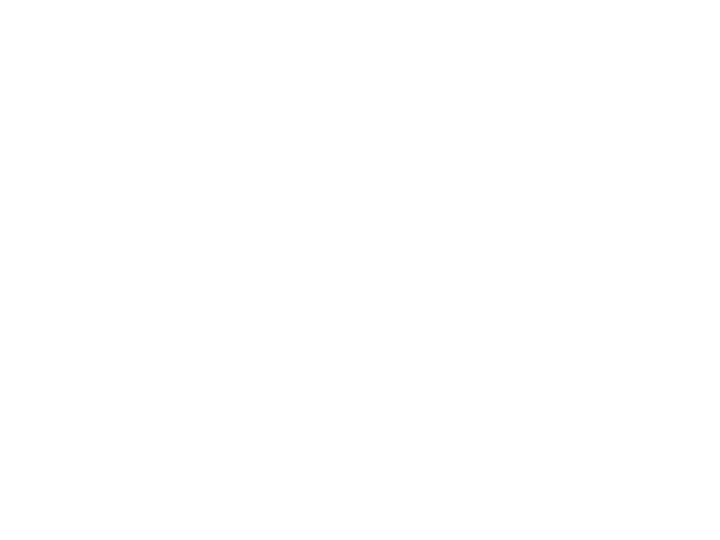

Text(0.5, 0, 'v')

In [3]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.PYR, data.NADH, data.rate)
ax.set_xlabel('[PYR]')
ax.set_ylabel('[NADH]')
ax.set_zlabel('v')

In [4]:
plt.close('all')

In [5]:
def vmax(vf, kb, kc, b ,c): #MM
    return (vf*b*c)/((b+kb)*(c+kc))

In [7]:
indiv_rate = np.array(pd.concat([data.rate]))
indiv_NADH = np.array(pd.concat([data.NADH]))
indiv_PYR = np.array(pd.concat([data.PYR]))

In [8]:
datadict = {'rate': indiv_rate, 'NADH': indiv_NADH, 'PYR': indiv_PYR}
fulldata = pd.DataFrame(datadict)

In [9]:
fulldata

,rate,NADH,PYR
0,NaN,0.500,40.500
1,0.103992,0.500,37.800
2,0.099148,0.500,27.000
3,0.102322,0.500,13.500
4,0.074061,0.500,6.750
...,...,...,...
142,0.016638,0.042,27.000
143,0.016650,0.042,13.500
144,NaN,0.042,6.750
145,0.013577,0.042,4.450


In [10]:
mymod4 = Model(vmax, independent_vars=['b', 'c'])
mypar4 = mymod4.make_params(vf=1, kNADH=1, kPYR=1)
for p in mypar4:
    mypar4[p].set(min=1e-6, max=1000)
myfit4 = mymod4.fit(fulldata['rate'], params=mypar4, b=fulldata['NADH'], c=fulldata['PYR'],nan_policy='omit')
print(myfit4.fit_report())

[[Model]]
    Model(vmax)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 52
    # data points      = 136
    # variables        = 3
    chi-square         = 0.01606670
    reduced chi-square = 1.2080e-04
    Akaike info crit   = -1223.93795
    Bayesian info crit = -1215.19999
[[Variables]]
    vf:  0.15169923 +/- 0.00648733 (4.28%) (init = 1)
    kb:  0.12099546 +/- 0.01178760 (9.74%) (init = 1e-06)
    kc:  6.17514650 +/- 0.64388482 (10.43%) (init = 1e-06)
[[Correlations]] (unreported correlations are < 0.100)
    C(vf, kb) = 0.699
    C(vf, kc) = 0.610


In [11]:
NADHvals = data.NADH.unique()

In [12]:
PYRvals = data.PYR.unique()

In [13]:
data[data.PYR==2]

,Unnamed: 0,Repeat_2,Repeat_3,Repeat_1,Rate,PYR,NADH


<IPython.core.display.Javascript object>


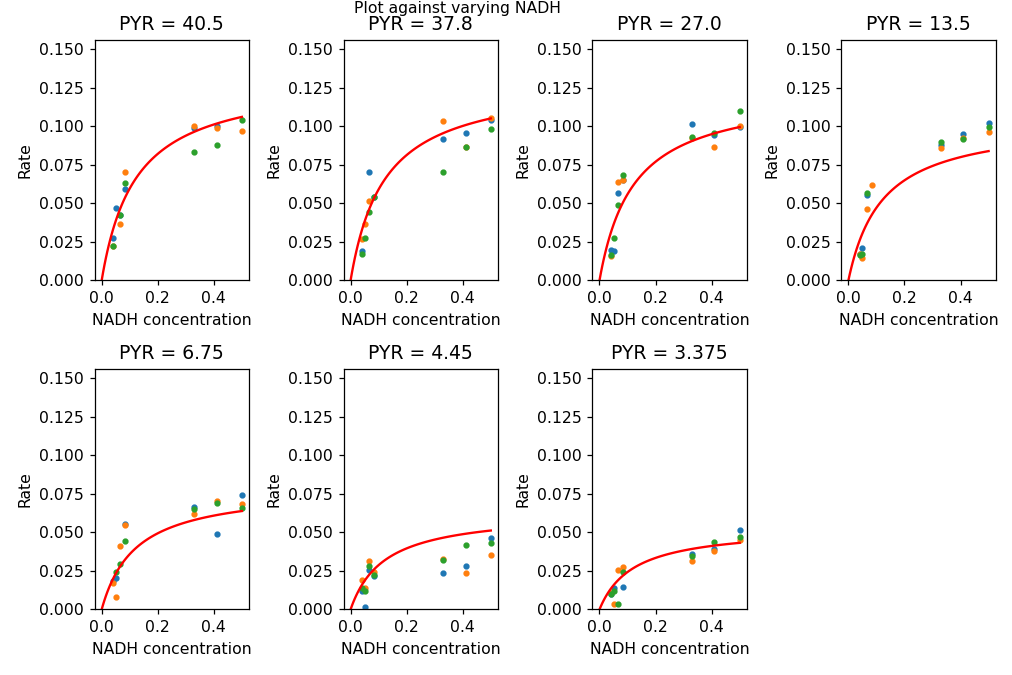

In [17]:
xvals = np.linspace(0, data.NADH.max(), 101)

f, ax = plt.subplots(nrows=2, ncols=4, figsize=(9,6))
for i in range(len(PYRvals)):
    ax[i//4,i%4].plot(data[data.PYR==PYRvals[i]].NADH, data[data.PYR==PYRvals[i]].rate, '.')
    ax[i//4,i%4].plot(xvals, myfit4.eval(myfit4.params, b=xvals, c=PYRvals[i]), 'r-')
    ax[i//4,i%4].set_title('PYR = '+str(PYRvals[i]))
    ax[i//4,i%4].set_xlabel('NADH concentration (mM)')
    ax[i//4,i%4].set_ylabel('Rate (µmol/min/mg prot)')
    ax[i//4,i%4].set_ylim(0, data.rate.max()*1.5)
ax[1,3].set_visible(False)
f.text(0.35, 0.98,'Plot against varying NADH')
f.tight_layout()

In [18]:
plt.close('all')

<IPython.core.display.Javascript object>


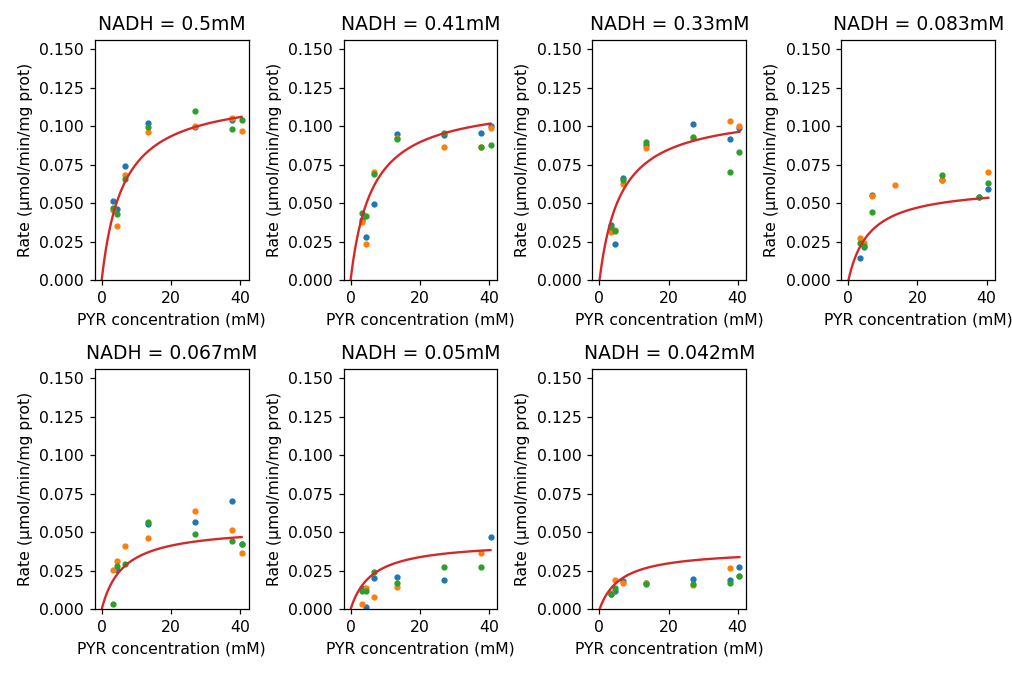

In [22]:
xvals = np.linspace(0, data.PYR.max(), 101)

f, ax = plt.subplots(nrows=2, ncols=4, figsize=(9,6))
for i in range(len(PYRvals)):
    ax[i//4,i%4].plot(data[data.NADH==NADHvals[i]].PYR, data[data.NADH==NADHvals[i]].rate, '.')
    ax[i//4,i%4].plot(xvals, myfit4.eval(myfit4.params, b=NADHvals[i], c=xvals), '-')
    ax[i//4,i%4].set_title('NADH = '+str(NADHvals[i])+str('mM'))
    ax[i//4,i%4].set_xlabel('PYR concentration (mM)')
    ax[i//4,i%4].set_ylabel('Rate (µmol/min/mg prot)')
    ax[i//4,i%4].set_ylim(0, data.rate.max()*1.5)
ax[1,3].set_visible(False)
f.tight_layout()

In [23]:
plt.close('all')